<a href="https://colab.research.google.com/github/mad-havan/OIBSIP/blob/main/EMAIL_SPAM_DETECTION_WITH_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [ ]:
data=pd.read_csv('/content/spam.csv')

In [ ]:
data.head(30)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
data.shape

(5572, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data['Category']=data['Category'].apply(lambda x:0 if x=='spam' else 1)

In [ ]:
data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X=data['Message']
Y=data['Category']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
# min_df=1 means it will choose all word which has occured atleast once in the dataset
# stop_words are " is, was , the, a ", etc so all stop words are removed
# and changing to lowercase alphabets for better processing

In [ ]:
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

# converting y_train and y_test values as integers , now its as objects

In [ ]:
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

In [ ]:
print(X_train_features)

  (0, 5818)	0.22682143517864364
  (0, 2497)	0.2442158912653505
  (0, 694)	0.3171299579602537
  (0, 6264)	0.1898892037332199
  (0, 5800)	0.17558937755823417
  (0, 3262)	0.33791755486732394
  (0, 2049)	0.3034375179183143
  (0, 7300)	0.24288153842988894
  (0, 2724)	0.3544175987866074
  (0, 354)	0.3544175987866074
  (0, 7162)	0.2550284465664535
  (0, 258)	0.2379428657041507
  (0, 7222)	0.2173884735352799
  (0, 5512)	0.1898892037332199
  (1, 2555)	0.3840709491751004
  (1, 3804)	0.1902902346515268
  (1, 3932)	0.24325511357721427
  (1, 4509)	0.4028245991060671
  (1, 2440)	0.33870544648398715
  (1, 3333)	0.20665394084233096
  (1, 5650)	0.360444144470318
  (1, 2335)	0.2162321275166079
  (1, 6738)	0.28986069568918
  (1, 6109)	0.3239762634465801
  (1, 3267)	0.2678713077029217
  :	:
  (4452, 2438)	0.4574160733416501
  (4452, 7280)	0.3968991650168732
  (4452, 3978)	0.4574160733416501
  (4452, 3290)	0.26370969643076225
  (4452, 3084)	0.22948428918295163
  (4452, 2236)	0.2676662072392096
  (4453, 387

Training the model

In [ ]:
model=MultinomialNB()
model.fit(X_train_features,Y_train)

MultinomialNB()

0.9766816143497757


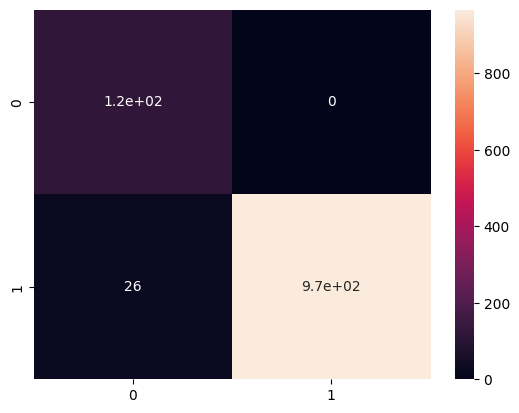

In [ ]:
y_pred=model.predict(X_test_features)
accuracy=accuracy_score(y_pred,Y_test)
cn=confusion_matrix(y_pred,Y_test)
sns.heatmap(cn,annot=True)
print(accuracy)

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90       149
           1       0.97      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
input_mail=["Pity, * was in mood for that. So...any other suggestions?"]

input_features=feature_extraction.transform(input_mail)
pred=model.predict(input_features)
if(pred[0]==0):
      print("It's a spam mail")
else:
      print("It's not a spam mail")


It's not a spam mail


In [ ]:
import pickle
pickle.dump(feature_extraction,open('vectorizer.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))